In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [9]:
df = pd.read_csv("Social_Network_Ads.csv")
X = df[["Age", "EstimatedSalary"]].values
y = df["Purchased"].values

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [11]:
poly = PolynomialFeatures(degree = 6)
X_poly = poly.fit_transform(X_scaled)

In [12]:
model = LogisticRegression(C = 1.0, penalty = 'l2', solver = 'lbfgs', max_iter = 1000)
model.fit(X_poly, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [13]:
y_pred = model.predict(X_poly)
accuracy = accuracy_score(y, y_pred)
print(accuracy*100)

90.25


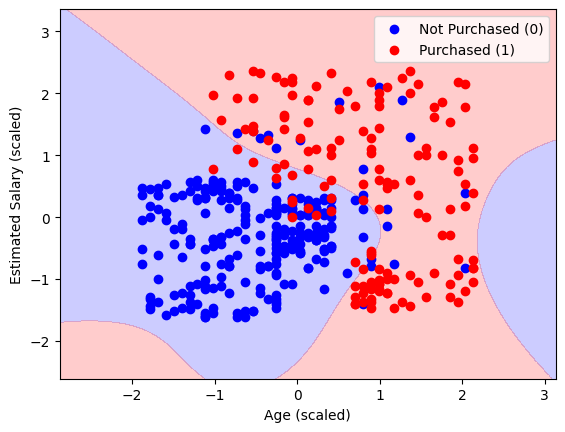

In [14]:

xx, yy = np.meshgrid(np.linspace(X_scaled[:,0].min()-1, X_scaled[:,0].max()+1, 200),
                     np.linspace(X_scaled[:,1].min()-1, X_scaled[:,1].max()+1, 200))

grid = np.c_[xx.ravel(), yy.ravel()]
grid_poly = poly.transform(grid)
probs = model.predict_proba(grid_poly)[:,1].reshape(xx.shape)

plt.contourf(xx, yy, probs, levels=[0,0.5,1], alpha=0.2, colors=['blue','red'])
plt.scatter(X_scaled[y==0,0], X_scaled[y==0,1], color='blue', label='Not Purchased (0)')
plt.scatter(X_scaled[y==1,0], X_scaled[y==1,1], color='red', label='Purchased (1)')
plt.xlabel("Age (scaled)")
plt.ylabel("Estimated Salary (scaled)")
plt.legend()
plt.show()
